In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [3]:
#loading data
#checking data
data = pd.read_csv("train.csv")
print("train shape:", data.shape, "total data points:", data.shape[0], "total attributes:", data.shape[1])
breed_labels =pd.read_csv("breed_labels.csv")
print("breed label shape:", breed_labels.shape, "total breed:", breed_labels.shape[0])
color_labels = pd.read_csv("color_labels.csv")
print("color label shape:", color_labels.shape, "total colors:",color_labels.shape[0])
state_labels = pd.read_csv("state_labels.csv")
print("state label shape:", state_labels.shape, "total state:", state_labels.shape[0])

train shape: (14993, 24) total data points: 14993 total attributes: 24
breed label shape: (307, 3) total breed: 307
color label shape: (7, 2) total colors: 7
state label shape: (15, 2) total state: 15


<h2>1. EDA-</h2>
<br><b>We'll be looking at individual features.</b>
<h3>1.1 Target class ( AdoptionSpeed ) </h3>

* We'll look at class distribution and investigate for imbalance distribution.
* So there are total 4 target class i.e, 0,1,2,3,4 which means-
<ol><li><b>0</b> - Pet was adopted on the same day as it was listed.</li>
<li><b>1</b> - Pet was adopted between 1 and 7 days (1st week) after being listed.</li>
<li><b>2</b> - Pet was adopted between 8 and 30 days (1st month) after being listed.</li>
<li><b>3</b> - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.</li>
<li><b>4</b> - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days)</li>

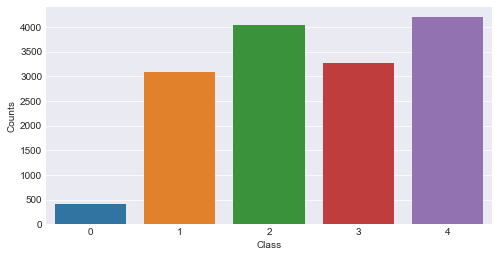

In [12]:
fig, axe = plt.subplots(figsize=(8,4))
count_valu = data["AdoptionSpeed"].value_counts()
sns.set_style('darkgrid')
sns.barplot(count_valu.index, count_valu.values,orient="v", ax=axe)
plt.ylabel("Counts")
plt.xlabel("Class")
plt.xticks(ticks=[0,1,2,3,4],labels=("0","1","2","3","4"))
plt.show()

<li>Also look at pi chart to get better idea about percent distribution of each class

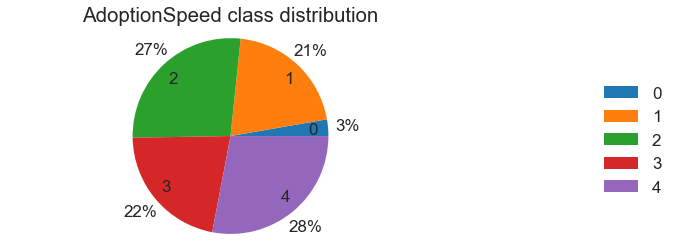

In [53]:
#https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a
fig, ax = plt.subplots(figsize=(8,4))
plt.rcParams['font.size']=17
#percent count
labels = ["0","1", "2", "3", "4"]
percentages = [(data["AdoptionSpeed"].value_counts()[0]*100)/data.shape[0],
               (data["AdoptionSpeed"].value_counts()[1]*100)/data.shape[0],
              (data["AdoptionSpeed"].value_counts()[2]*100)/data.shape[0],
              (data["AdoptionSpeed"].value_counts()[3]*100)/data.shape[0],
              (data["AdoptionSpeed"].value_counts()[4]*100)/data.shape[0]]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=0.8)
ax.axis('equal')
ax.set_title("AdoptionSpeed class distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<b>Conclusion:</b>
<p>From above distribution plot it is clear that data is imbalanced and there is only one class that is extreme minor i.e, 0 which counts for only 3% of all the data which is very very small. Rest of other 4 classes have very similar distribution. So we'll have have to take care of minor class.</p>

<h3>1.2 Missing(NaN) in any attribute/feature</h3>

* This will give us a high level idea about NaN in any of attribute

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

<b>Conclusion:</b> From above we got idea about features having NaN. It seems only two feature one is Name and other Description which have nan values. Well, Name is not that important but Description feature is very important and only 4 Description entries are NaN so we can handle that. 

<h3>1.3 Pet Type</h3>
<br>
<li>We'll look at distribution of cat and dog and which pet is most likely to get adopted sooner with the help of plot below. Here I'm going to use stacked bar plot to have good idea from one plot alone.</li>

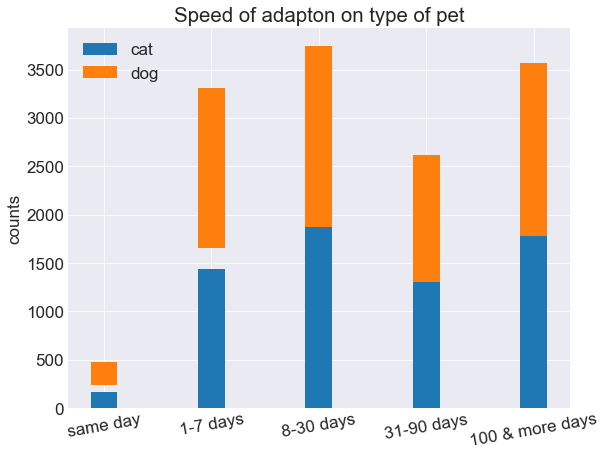

In [85]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
dog_ = []
cat_ = []

#seprate cat and dog
dog = data[data["Type"]==1].AdoptionSpeed.value_counts()
cat = data[data["Type"]==2].AdoptionSpeed.value_counts()

#appending to varibles
for i in range(len(dog)):
    #first dog then cat
    dog_.append(dog[i])
    cat_.append(cat[i])

#some veriabels
total_ft = len(dog_)
indx = np.arange(total_ft)
width = 0.25
    
#plotting
plt.figure(figsize=(9,7))
p1 = plt.bar(indx, dog_, width)
p2 = plt.bar(indx, cat_, width, bottom=cat_)

plt.ylabel("counts")
plt.title("Speed of adapton on type of pet")
plt.xticks(indx, ["same day","1-7 days","8-30 days","31-90 days","100 & more days"], rotation=10)
plt.legend((p1[0], p2[0]), ('cat', 'dog'))
plt.show()

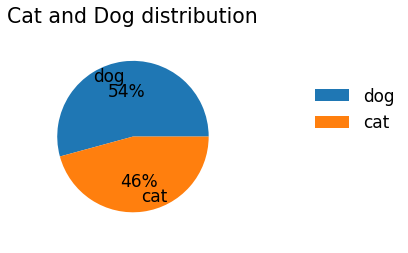

In [10]:
#https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a
fig, ax = plt.subplots(figsize=(3,4))
plt.rcParams['font.size']=17
#percent count
labels = ["dog","cat"]
percentages = [(data[data["Type"]==1].AdoptionSpeed.shape[0]*100)/data.shape[0],
               (data[data["Type"]==2].AdoptionSpeed.shape[0]*100)/data.shape[0]]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.6,labeldistance=0.8)
ax.axis('equal')
ax.set_title("Cat and Dog distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<h5>Conclusion:</h5>
<br>
<li><b>From above It's clear that people are not biased towards any of pets while adopting them. Speed of adaption for both pet is almost same. Since dog pet is 8 percent more in population comparing to cat so we can conlcude one more thing is that dog are slighlty more likely to get listed for adoption comparing to cats.</b></li>

<h3> 1.4 Pet Age feature</h3>

In [44]:
print(len(data.Age.value_counts()))
data.Age.describe()

106


count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

<li>From above it seems age features have some outliers.</li>
<li>Maximum life expectancy of a dog is around 120-156 Months on average and Maximum life expectancy of a cat is around 24-192 Months on average(Src-google). And above we can see maximum age is 255 months so there is clearly some outleirs. And also around 75 percent of all pets are of 12 months or under 12 months old.</li>
<li>Also, there are total 106 unique age across different pets.</li>
<li>As, there are two types of pets i.e, cat and dog so we'll have to look at both to get better idea about for which pet we're having an outlier.</li>
<p><b>Analysis of outlier-Cat and dog</b></p>
<p>Note: Below threshold age is decided after going through different blog and from there I got maximum possible age of dog and cats in most case. So--</p>
<p>We'll look at numbers of entries with age above 200 months for cats.</p>
<p>We'll look at numbers of entries with age above 160 months for dogs.</p>

In [54]:
#cat type 2
print("Total possible outlier age for cat: ", data[(data["Type"]==2) & (data["Age"]>=200)].shape[0])
#dog type 1
print("Total possible outlier age for dog: ", data[(data["Type"]==1) & (data["Age"]>=160)].shape[0])

Total possible outlier age for cat:  2
Total possible outlier age for dog:  6


In [60]:
print("before:",data.shape[0])
data.drop(data[(data["Type"]==2) & (data["Age"]>=200)].index, inplace = True) 
print("After cat age outliers removed:",data.shape[0])
data.drop(data[(data["Type"]==1) & (data["Age"]>=160)].index, inplace = True) 
print("After dog age outliers removed:",data.shape[0])

before: 14993
After cat age outliers removed: 14991
After dog age outliers removed: 14985


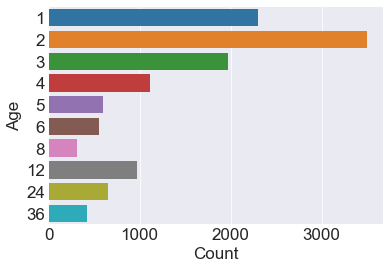

In [224]:
#looking at top 10 most freqeunt age across both cat and dog
fig, axe = plt.subplots()
count_valu = data["Age"].value_counts()
sns.set_style('darkgrid')
sns.barplot(count_valu.values[0:10],count_valu.index[0:10],orient="h", ax=axe)
plt.xlabel("Count")
plt.ylabel("Age")
plt.show()

<li> From above we can take a conclusion that around 50-60% of pets are 1-4 months old only.</li>
<b>It's a very commonsensical that age of pet is very important factor while adoption. So now we'll look at adoption speed with respect to age.</b>

<h3>Utility function:</h3><h4>Function for ploting stacked bar plot: </h4>

In [328]:
def plot_stackbar(feature, num_range, plot_title, xlabel, xtick_index):
    
    """Function to plot stacked bar plot
    feature: categorical feature,
    num_range: Numbers of categorical values in categorical feature,
    plot_title: Title of plot,
    xtick_index: List of label for each bar in plot.
    xlabel = xaxis label of plot
    """
    
    class_0 = []
    class_1 = []
    class_2 = []
    class_3 = []
    class_4 = []

    #appending to varibles
    for i in range(1,num_range+1):
        class_0.append(data[(data[feature]==i) & (data["AdoptionSpeed"]==0)].shape[0])
        class_1.append(data[(data[feature]==i) & (data["AdoptionSpeed"]==1)].shape[0])
        class_2.append(data[(data[feature]==i) & (data["AdoptionSpeed"]==2)].shape[0])
        class_3.append(data[(data[feature]==i) & (data["AdoptionSpeed"]==3)].shape[0])
        class_4.append(data[(data[feature]==i) & (data["AdoptionSpeed"]==4)].shape[0])

    #some veriabels
    total_ft = num_range
    indx = np.arange(total_ft)
    width = 0.25


    #plotting
    plt.figure(figsize=(9,5))

    #stacking differetn plots
    p1 = plt.bar(indx, class_0, width)
    p2 = plt.bar(indx, class_1, width, bottom=class_0)
    p3 = plt.bar(indx, class_2, width, bottom=class_1)
    p4 = plt.bar(indx, class_3, width, bottom=class_2)
    p5 = plt.bar(indx, class_4, width, bottom=class_3)

    plt.ylabel("counts")
    plt.title(plot_title)
    plt.xticks(indx, xtick_index)
    plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("same day","1-7 days","8-30 days","31-90 days","100 & more days"))
    plt.xlabel(xlabel)
    plt.show()
    
def check_distr(attribute):
    plt.figure(figsize=(20, 8))

    plt.subplot(1,2,1)
    sns.violinplot(x = 'AdoptionSpeed', y = attribute, data = data)

    plt.subplot(1,2,2)
    sns.distplot(data[data['AdoptionSpeed'] == 1][attribute], label = "Same day", color = 'red')
    sns.distplot(data[data['AdoptionSpeed'] == 2][attribute], label = "8-30 days" , color = 'blue' )
    sns.distplot(data[data['AdoptionSpeed'] == 3][attribute], label = "31-90 days" , color = 'yellow' )
    sns.distplot(data[data['AdoptionSpeed'] == 4][attribute], label = "100 & more days" , color = 'green' )

    plt.legend()
    plt.show()

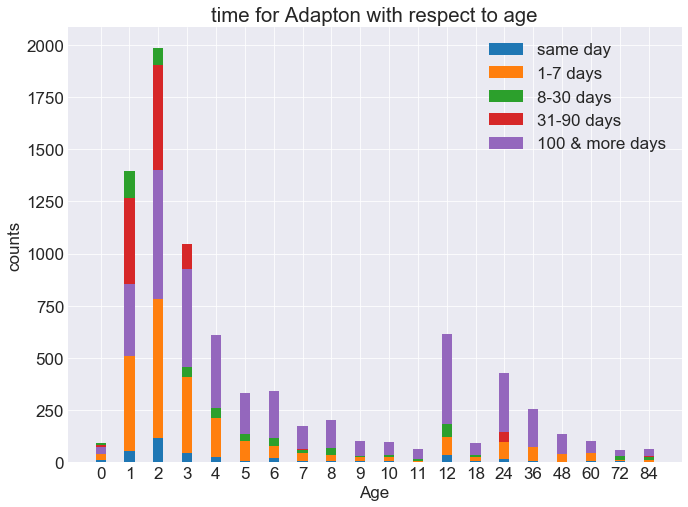

In [239]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
class_0 = []
class_1 = []
class_2 = []
class_3 = []
class_4 = []


age_list = list(age_counts.index)[:20]
age_list.sort()

#appending to varibles
for i in age_list:
    class_0.append(data[(data["Age"]==i) & (data["AdoptionSpeed"]==0)].shape[0])
    class_1.append(data[(data["Age"]==i) & (data["AdoptionSpeed"]==1)].shape[0])
    class_2.append(data[(data["Age"]==i) & (data["AdoptionSpeed"]==2)].shape[0])
    class_3.append(data[(data["Age"]==i) & (data["AdoptionSpeed"]==3)].shape[0])
    class_4.append(data[(data["Age"]==i) & (data["AdoptionSpeed"]==4)].shape[0])
    
#some veriabels
total_ft = len(age_list)
indx = np.arange(total_ft)
width = 0.35
    
#plotting
plt.figure(figsize=(11,8))

#stacking differetn plots
p1 = plt.bar(indx, class_0, width)
p2 = plt.bar(indx, class_1, width, bottom=class_0)
p3 = plt.bar(indx, class_2, width, bottom=class_1)
p4 = plt.bar(indx, class_3, width, bottom=class_2)
p5 = plt.bar(indx, class_4, width, bottom=class_3)

plt.ylabel("counts")
plt.title("time for Adapton with respect to age")
plt.xticks(indx, age_list)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("same day","1-7 days","8-30 days","31-90 days","100 & more days"))
plt.xlabel("Age")
plt.show()

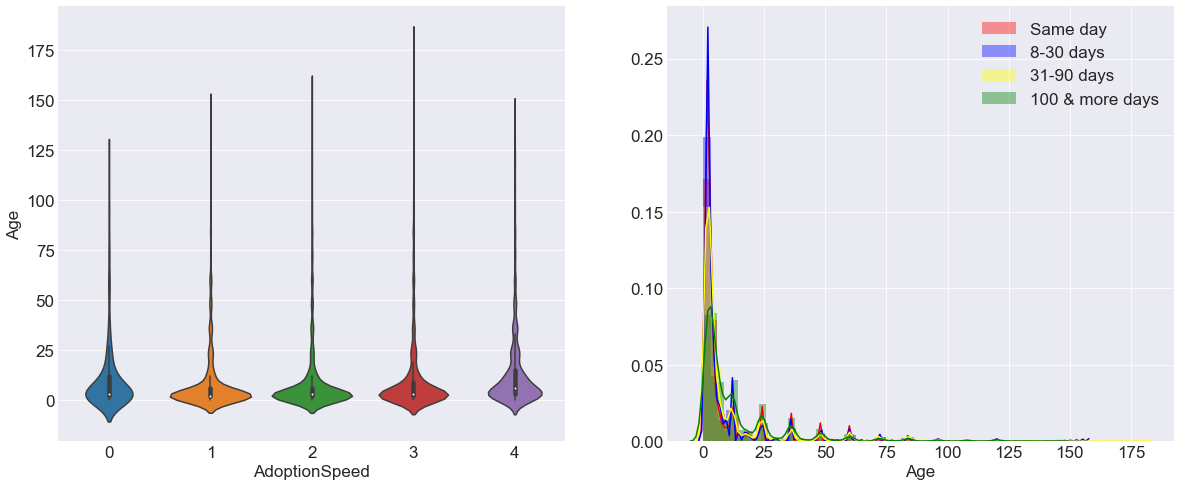

In [329]:
check_distr("Age")

<h5>Observation:</h5>
<br>
<li>As we can see That there is very high overlapping so there is very low chance that this attribute will help in classification. As age is very important feature but it seems overlapping is a lot.</li>
<li>Well, if we look at above stacked bar plot then we'll find that as age is increasing then likelihood of not being adopted is increasing. Means age is somewhere an important feature. Age is large then most likely to not adopted </li>


<h3> 1.5 Gender feature</h3>
<br>
<li>I went through various articles to know does pet gender realy that much matter, Does people consider gender as important as age or other important factor and found it depends. So let's look at gender to know more...</li>
<li>There are three categorical value in Gender categorical feature where 1 = Male, 2 = Female, 3 = Mixed(if profile represents group of pets).</li>

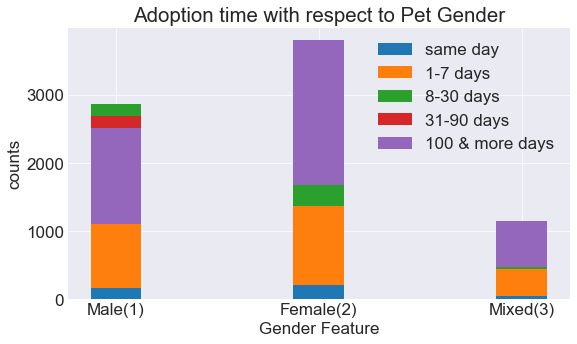

In [180]:
plot_stackbar("Gender", 3, "Adoption time with respect to Pet Gender","Gender Feature",
             ["Male(1)", "Female(2)", "Mixed(3)"])

<h5>Observation:</h5>
<br>
<li>By looking at above plot can't say anything clear about this observation. As Either it's Male or femlae have note much difference in adoption time.And there is more female pets are more comparing to Male pets</li>

<h3> 1.6 Maturity Size feature</h3>
<br>
<li>This is also a very important features because pet physical size is also very important and people actually looks at size while considering for pet adaption.</li>
<li>There are four categorical value in Maturitysize categorical feature where 1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified</li>

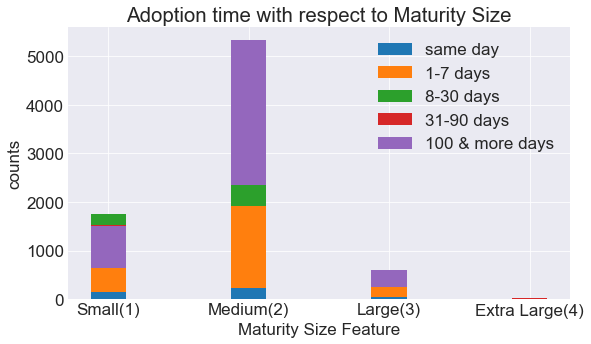

In [183]:
plot_stackbar("MaturitySize", 4, "Adoption time with respect to Maturity Size","Maturity Size Feature",
             ["Small(1)", "Medium(2)", "Large(3)", "Extra Large(4)"])

<h5>Observation:</h5>
<p>Most of pets are of medium size and there are very small nos of extra large pets. And there is also not clear as from above plot can't say that for which MaturitySize feature adoption is faster. </p>

<h3> 1.7 Pet Fur Length feature[FurLength]</h3>
<br>
<li>Pet fur length might also be an important attributes. Beacuse while adoption of a pet, an adopter may look at pet fur coz a dog or cat with different fur length (hair on body) may look more better. So we'll be looking at this features.</li>
<li>There are three categorical value in categorical feature FurLength where 1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified.</li>

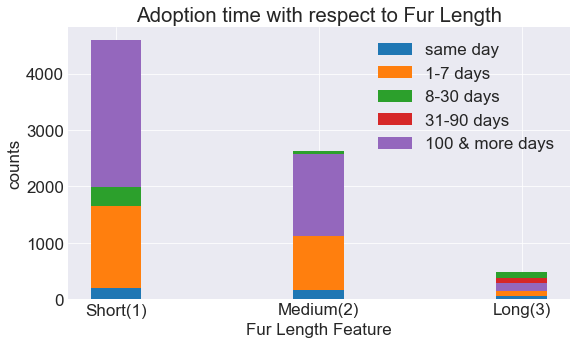

In [184]:
plot_stackbar("FurLength", 3, "Adoption time with respect to Fur Length","Fur Length Feature",
             ["Short(1)", "Medium(2)", "Long(3)"])

<h3> 1.8 Vaccinated Feature</h3>

In [185]:
data.Vaccinated.value_counts()

2    7227
1    5894
3    1864
Name: Vaccinated, dtype: int64

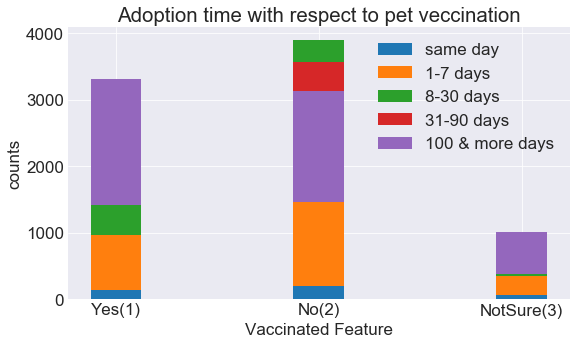

In [186]:
plot_stackbar("Vaccinated", 3, "Adoption time with respect to pet veccination","Vaccinated Feature",
             ["Yes(1)", "No(2)", "NotSure(3)"])

<h3> 1.10 State Feature</h3>

In [233]:
state_labels = pd.read_csv("state_labels.csv")
print("Total number of unique states across all adoption ",len(data.State.value_counts()))

Total number of unique states across all adoption  14


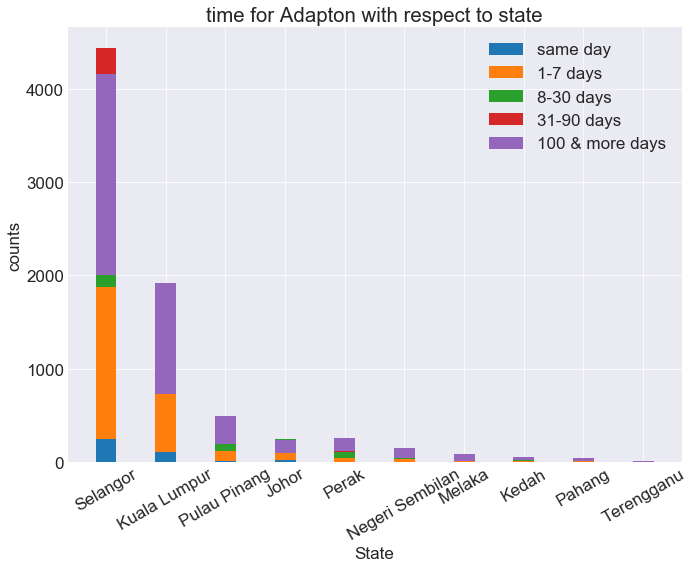

In [262]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
class_0 = []
class_1 = []
class_2 = []
class_3 = []
class_4 = []


state_list = list(data.State.value_counts().index)[:10]

#appending to varibles
for i in state_list:
    class_0.append(data[(data["State"]==i) & (data["AdoptionSpeed"]==0)].shape[0])
    class_1.append(data[(data["State"]==i) & (data["AdoptionSpeed"]==1)].shape[0])
    class_2.append(data[(data["State"]==i) & (data["AdoptionSpeed"]==2)].shape[0])
    class_3.append(data[(data["State"]==i) & (data["AdoptionSpeed"]==3)].shape[0])
    class_4.append(data[(data["State"]==i) & (data["AdoptionSpeed"]==4)].shape[0])
    
#some veriabels
total_ft = len(state_list)
indx = np.arange(total_ft)
width = 0.35
    
#plotting
plt.figure(figsize=(11,8))

#stacking differetn plots
p1 = plt.bar(indx, class_0, width)
p2 = plt.bar(indx, class_1, width, bottom=class_0)
p3 = plt.bar(indx, class_2, width, bottom=class_1)
p4 = plt.bar(indx, class_3, width, bottom=class_2)
p5 = plt.bar(indx, class_4, width, bottom=class_3)

plt.ylabel("counts")
plt.title("time for Adapton with respect to state")
plt.xticks(indx, [state_labels[state_labels["StateID"]==i]["StateName"].values[0] for i in state_list], rotation=30)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("same day","1-7 days","8-30 days","31-90 days","100 & more days"))
plt.xlabel("State")
plt.show()

<h5>Observation:</h5>
<p>likelihood of a pet being adopted from above these state is very low. As most adoption time is more thna 100 days. For stats like Perak, Negeri Sembilan, Melaka, etc</p>

<h3> 1.11 Fee Feature</h3>

In [190]:
data.Fee.describe()

count    14985.000000
mean        21.271338
std         78.433939
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3000.000000
Name: Fee, dtype: float64

<li>Around 85% of total adoption posting have zero Fee.</li>
<li>And there seems some outlier because max fee value is 3000 and that seems alot. We'll do some analysis on fee values.</li>

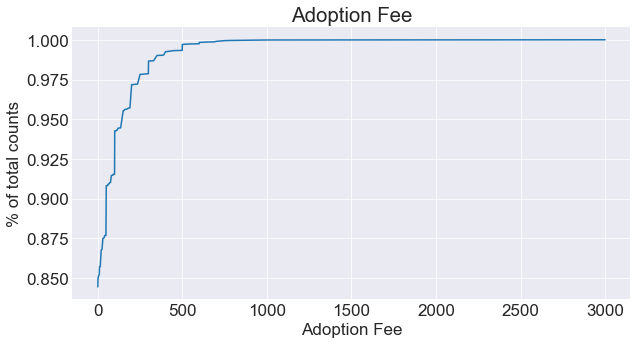

In [222]:
index = np.argsort(list(data.Fee.value_counts().index))
#plotting
plt.figure(figsize=(10,5))
plt.plot(data.Fee.value_counts().index[index],
        np.cumsum(data.Fee.value_counts().values[index])/np.sum(data.Fee.value_counts().values[index]))
plt.title("Adoption Fee")
plt.ylabel("% of total counts")
plt.xlabel("Adoption Fee")
plt.show()

<li>So from above it is clear that 99.99% of adoption have Fee below 1000 so we can discard rest of entries with Fee above 1000. [On kaggle page there is no any mention for currency so I'm assuming Fee is in $).</li>
<li>There was only two such entries with Fee>1000 so I have removed that.</li>

In [226]:
print("Before Fee outlier removal:", data.shape[0])
data.drop(data[data["Fee"]>1000].index, inplace = True) 
print("After Fee outlier removal:", data.shape[0])

After Fee outlier removal: 14983


<h3> 1.13 Numbers of Photos (PhotoAmt) Feature</h3>


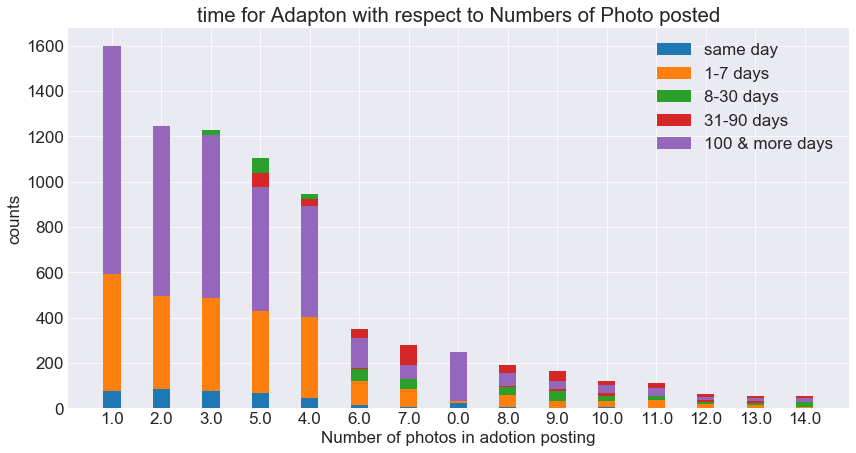

In [275]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
class_0 = []
class_1 = []
class_2 = []
class_3 = []
class_4 = []


photo_list = list(data.PhotoAmt.value_counts().index)[0:15]

#appending to varibles
for i in photo_list:
    class_0.append(data[(data["PhotoAmt"]==i) & (data["AdoptionSpeed"]==0)].shape[0])
    class_1.append(data[(data["PhotoAmt"]==i) & (data["AdoptionSpeed"]==1)].shape[0])
    class_2.append(data[(data["PhotoAmt"]==i) & (data["AdoptionSpeed"]==2)].shape[0])
    class_3.append(data[(data["PhotoAmt"]==i) & (data["AdoptionSpeed"]==3)].shape[0])
    class_4.append(data[(data["PhotoAmt"]==i) & (data["AdoptionSpeed"]==4)].shape[0])
    
#some veriabels
total_ft = len(photo_list)
indx = np.arange(total_ft)
width = 0.35
    
#plotting
plt.figure(figsize=(14,7))

#stacking differetn plots
p1 = plt.bar(indx, class_0, width)
p2 = plt.bar(indx, class_1, width, bottom=class_0)
p3 = plt.bar(indx, class_2, width, bottom=class_1)
p4 = plt.bar(indx, class_3, width, bottom=class_2)
p5 = plt.bar(indx, class_4, width, bottom=class_3)

plt.ylabel("counts")
plt.title("time for Adapton with respect to Numbers of Photo posted")
plt.xticks(indx, photo_list)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("same day","1-7 days","8-30 days","31-90 days","100 & more days"))
plt.xlabel("Number of photos in adotion posting")
plt.show()

<h>Observation:</h>
<p>From above plot one thing is clear that if amount_of photos=0 then It's very high chance that pet may not get adopted. Also we can see that as amount_of photo is increasing then likelihoof of pet being adopted is also decreases. And amount of image is certainly an important feature. </p>

<h3> 1.14 Description Feature</h3>
<h4> 1.14.1 Wordcloud of description</h4>

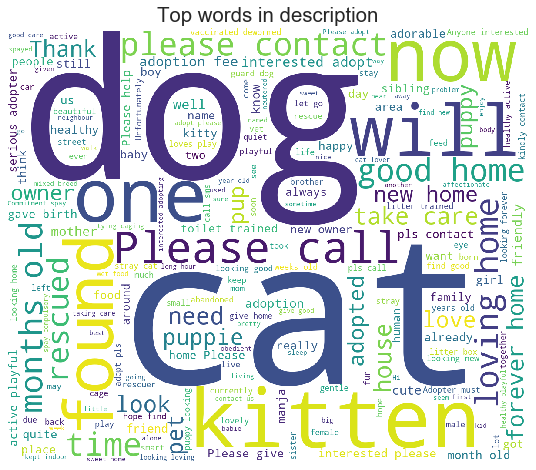

In [296]:
fig, ax = plt.subplots(figsize = (12, 8))
text_cat = ' '.join(data['Description'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top words in description');
plt.axis("off");

<h4> 1.14.2 Distribution of description length</h4>

In [299]:
data['Description'].fillna('', inplace=True)

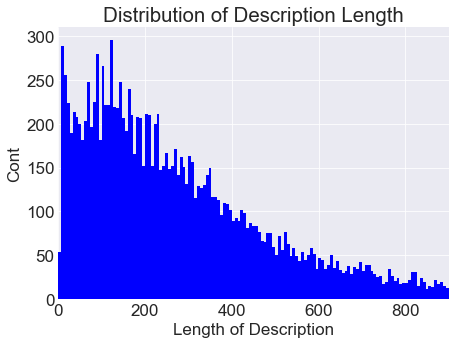


Median length:  238


In [302]:
len1 = [len(text) for text in data['Description'].values.tolist()]
plt.figure(figsize=(7,5))
plt.hist(len1, bins=1000, color='blue')
plt.title('Distribution of Description Length')
plt.xlabel('Length of Description')
plt.ylabel('Cont')
plt.xlim(0, 900)
plt.show()
len1.sort()
print("\nMedian length: ", len1[int(len(len1)/2)])

In [334]:
#saving cleaned train set
data.to_csv("train_clean.csv", index=False)